In [1]:
import numpy as np
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

from tqdm.notebook import tqdm

In [2]:
os.chdir("C:/Users/USER/Desktop/LG")

# 1. comparing setted cooktime and recorded localtime

In [3]:
df=pd.read_csv('Oven_sample.csv',encoding='cp949',parse_dates=['CREATE_DT','LOCAL_TIME','MONTH'],dayfirst=True)

In [4]:
df=df.drop(['LOCAL_TIME','Target_temp','MONTH'],axis=1)
df

,CREATE_DT,DEVICE_ID,EVENT,Cook_State,Cook_Mode,Cook_menu,Cook_hour,Cook_min,Cook_sec
0,2019-11-20 23:43:56,id_00000,요리재시작,요리,오븐 자동,군고구마,0,28,38
1,2019-11-30 10:50:26,id_00000,요리시작,요리,레인지,0,0,0,30
2,2019-11-30 10:53:51,id_00000,요리취소,대기,대기,0,0,0,0
3,2019-11-30 10:50:45,id_00000,요리멈춤,요리멈춤,레인지,0,0,2,42
4,2019-11-30 10:53:49,id_00000,요리멈춤,요리멈춤,레인지,0,0,0,31
...,...,...,...,...,...,...,...,...,...
286392,2021-05-16 21:58:16,id_00150,요리시작,요리,오븐,0,0,15,0
286393,2021-05-09 05:06:40,id_00150,요리시작,요리,레인지,0,0,0,30
286394,2021-05-09 05:06:20,id_00150,요리종료,요리종료,대기,0,0,0,0
286395,2021-05-09 05:04:19,id_00150,요리시작,요리,레인지,0,0,0,30


In [5]:
#요리 시간 변수 생성
df['time']=df['Cook_hour'].astype(int)*60*60 + df['Cook_min'].astype(int)*60 + df['Cook_sec'].astype(int)

In [6]:
#id_00000인 제품으로 시각화
df1=df[df['DEVICE_ID']=='id_00000']
df1

,CREATE_DT,DEVICE_ID,EVENT,Cook_State,Cook_Mode,Cook_menu,Cook_hour,Cook_min,Cook_sec,time
0,2019-11-20 23:43:56,id_00000,요리재시작,요리,오븐 자동,군고구마,0,28,38,1718
1,2019-11-30 10:50:26,id_00000,요리시작,요리,레인지,0,0,0,30,30
2,2019-11-30 10:53:51,id_00000,요리취소,대기,대기,0,0,0,0,0
3,2019-11-30 10:50:45,id_00000,요리멈춤,요리멈춤,레인지,0,0,2,42,162
4,2019-11-30 10:53:49,id_00000,요리멈춤,요리멈춤,레인지,0,0,0,31,31
...,...,...,...,...,...,...,...,...,...,...
2791,2021-05-15 07:56:43,id_00000,요리종료,요리종료,대기,0,0,0,0,0
2792,2021-05-15 07:59:02,id_00000,요리종료,요리종료,대기,0,0,0,0,0
2793,2021-05-15 07:58:31,id_00000,요리시작,요리,레인지,0,0,0,30,30
2794,2021-05-15 00:05:00,id_00000,요리시작,요리,레인지,0,0,0,30,30


In [7]:
#시간순으로 정렬
df1=df1.sort_values(by='CREATE_DT',ascending=True).reset_index(drop=True)
df1

,CREATE_DT,DEVICE_ID,EVENT,Cook_State,Cook_Mode,Cook_menu,Cook_hour,Cook_min,Cook_sec,time
0,2019-11-01 14:29:26,id_00000,요리종료,요리종료,대기,0,0,0,0,0
1,2019-11-02 03:23:20,id_00000,요리시작,요리,레인지,0,0,0,30,30
2,2019-11-03 01:41:16,id_00000,요리시작,요리,레인지,0,0,0,30,30
3,2019-11-03 01:41:47,id_00000,요리종료,요리종료,대기,0,0,0,0,0
4,2019-11-03 13:57:19,id_00000,요리시작,요리,레인지,0,0,0,30,30
...,...,...,...,...,...,...,...,...,...,...
2791,2021-05-28 11:34:04,id_00000,요리취소,대기,대기,0,0,0,0,0
2792,2021-05-29 00:55:53,id_00000,요리시작,요리,레인지,0,0,0,30,30
2793,2021-05-29 00:58:01,id_00000,요리재시작,요리,레인지,0,0,0,4,4
2794,2021-05-31 10:42:05,id_00000,요리시작,요리,레인지,0,0,0,30,30


## 1-1. 시간 차이 계산

In [8]:
df1['CREATE_diff']=pd.Series()

for i in tqdm(range(len(df1))):
    if i != len(df1)-1:
        df1.loc[i,'CREATE_diff']=(df1['CREATE_DT'][i+1]-df1['CREATE_DT'][i]).seconds
    else:
        df1.loc[i,'CREATE_diff']=0

In [9]:
df1

,CREATE_DT,DEVICE_ID,EVENT,Cook_State,Cook_Mode,Cook_menu,Cook_hour,Cook_min,Cook_sec,time,CREATE_diff
0,2019-11-01 14:29:26,id_00000,요리종료,요리종료,대기,0,0,0,0,0,46434.0
1,2019-11-02 03:23:20,id_00000,요리시작,요리,레인지,0,0,0,30,30,80276.0
2,2019-11-03 01:41:16,id_00000,요리시작,요리,레인지,0,0,0,30,30,31.0
3,2019-11-03 01:41:47,id_00000,요리종료,요리종료,대기,0,0,0,0,0,44132.0
4,2019-11-03 13:57:19,id_00000,요리시작,요리,레인지,0,0,0,30,30,49067.0
...,...,...,...,...,...,...,...,...,...,...,...
2791,2021-05-28 11:34:04,id_00000,요리취소,대기,대기,0,0,0,0,0,48109.0
2792,2021-05-29 00:55:53,id_00000,요리시작,요리,레인지,0,0,0,30,30,128.0
2793,2021-05-29 00:58:01,id_00000,요리재시작,요리,레인지,0,0,0,4,4,35044.0
2794,2021-05-31 10:42:05,id_00000,요리시작,요리,레인지,0,0,0,30,30,152.0


## 1-2. 요리가 시작/재시작 이후 멈춤 혹은 종료한 경우만 추출

In [10]:
li=[]
for i in tqdm(range(len(df1))):
    if i != len(df1)-1:
        if ((df1.loc[i,'EVENT'] in ['요리시작','요리재시작']) & (df1.loc[i+1,'EVENT'] in ['요리멈춤','요리종료','요리취소'])) | ((df1.loc[i,'EVENT']=='청소시작') & (df1.loc[i+1,'EVENT']=="청소종료")):
            li.append(i)
            li.append(i+1)

df2=df1.loc[li,]

## 1-3. 시각화

In [11]:
df3=df2.reset_index(drop=True)
df3

,CREATE_DT,DEVICE_ID,EVENT,Cook_State,Cook_Mode,Cook_menu,Cook_hour,Cook_min,Cook_sec,time,CREATE_diff
0,2019-11-03 01:41:16,id_00000,요리시작,요리,레인지,0,0,0,30,30,31.0
1,2019-11-03 01:41:47,id_00000,요리종료,요리종료,대기,0,0,0,0,0,44132.0
2,2019-11-04 03:35:06,id_00000,요리시작,요리,레인지,0,0,0,30,30,14.0
3,2019-11-04 03:35:20,id_00000,요리멈춤,요리멈춤,레인지,0,0,2,17,137,2.0
4,2019-11-04 06:35:43,id_00000,요리시작,요리,레인지,0,0,0,30,30,1.0
...,...,...,...,...,...,...,...,...,...,...,...
2061,2021-05-19 12:08:54,id_00000,요리멈춤,요리멈춤,레인지,0,0,0,36,36,6.0
2062,2021-05-20 09:31:56,id_00000,요리시작,요리,레인지,0,0,0,30,30,90.0
2063,2021-05-20 09:33:26,id_00000,요리종료,요리종료,대기,0,0,0,0,0,6291.0
2064,2021-05-28 11:26:38,id_00000,요리시작,요리,레인지,0,0,0,30,30,143.0


In [12]:
df3=df3.ix[::2,:]
x=df3['time']
y=df3['CREATE_diff']

C:\Users\Kyeongjun\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
C:\Users\Kyeongjun\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


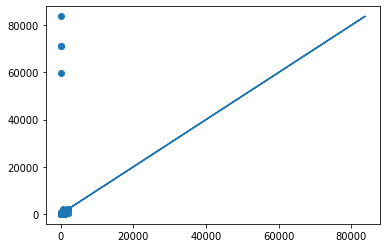

In [13]:
plt.scatter(x,y)
plt.plot(y,y)

엄청 큰 이상치 때문에 파악하는데 어려움이 있음

In [14]:
y[y>20000]

180     70997.0
810     59919.0
962     71055.0
1996    83827.0
Name: CREATE_diff, dtype: float64

## 1-4. 이상치 제거 후 다시 시각화

In [15]:
df3=df3.drop([180,810,962,1996],axis=0)

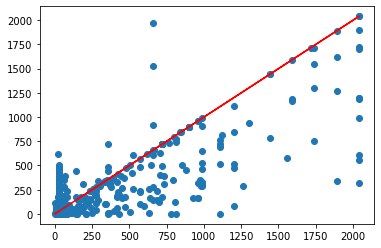

In [16]:
x=df3['time']
y=df3['CREATE_diff']

plt.scatter(x,y)
plt.plot(y,y,color='red')